In [2]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../../core'))
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
from dataclasses import dataclass, field, fields
import pack_cuda
import pack_vis
import pack_cost
import copy
import time
from IPython.display import HTML, display, clear_output
pack_cuda.USE_FLOAT32 = True
pack_cuda._ensure_initialized()


init CUDA
Detected GPU compute capability: 8.9 (arch=sm_89)
GPU max threads per block: 1024
=== Compiling kernel variant: crystal ===
Defines: ENABLE_CRYSTAL_AXES, ENABLE_OVERLAP_AREA, ENABLE_SEPARATION
Command: /usr/local/cuda/bin/nvcc -O3 -use_fast_math --extra-device-vectorization --ptxas-options=-v,--warn-on-spills -arch=sm_89 -DENABLE_CRYSTAL_AXES -DENABLE_OVERLAP_AREA -DENABLE_SEPARATION -cubin /mnt/d//packing/temp/pack_cuda_saved.cu -o /mnt/d//packing/temp/pack_cuda_crystal.cubin
ptxas info    : 0 bytes gmem, 1172 bytes cmem[3]
ptxas info    : Compiling entry function 'multi_boundary_distance_list_total' for 'sm_89'
ptxas info    : Function properties for multi_boundary_distance_list_total
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 36 registers, 404 bytes cmem[0], 16 bytes cmem[2]
ptxas info    : Compiling entry function 'multi_boundary_list_total' for 'sm_89'
ptxas info    : Function properties for multi_boundary_list_total
    240 b

In [3]:
%load_ext pyinstrument

In [4]:
runner = kgs.dill_load(kgs.temp_dir + 'ga_multi_tree_11_to_25' + '.pickle')

In [5]:
#runner.ga.diagnostic_plots(-1,None)

In [7]:
runner.ga.ga_list = runner.ga.ga_list[6:]
runner.ga.champions = runner.ga.champions[6:]
runner.ga.best_costs_per_generation = runner.ga.best_costs_per_generation[6:]
runner.filename = 'ga_multi_tree_11_to_25_cont'
#runner.plot_every = 1


KeyboardInterrupt: 

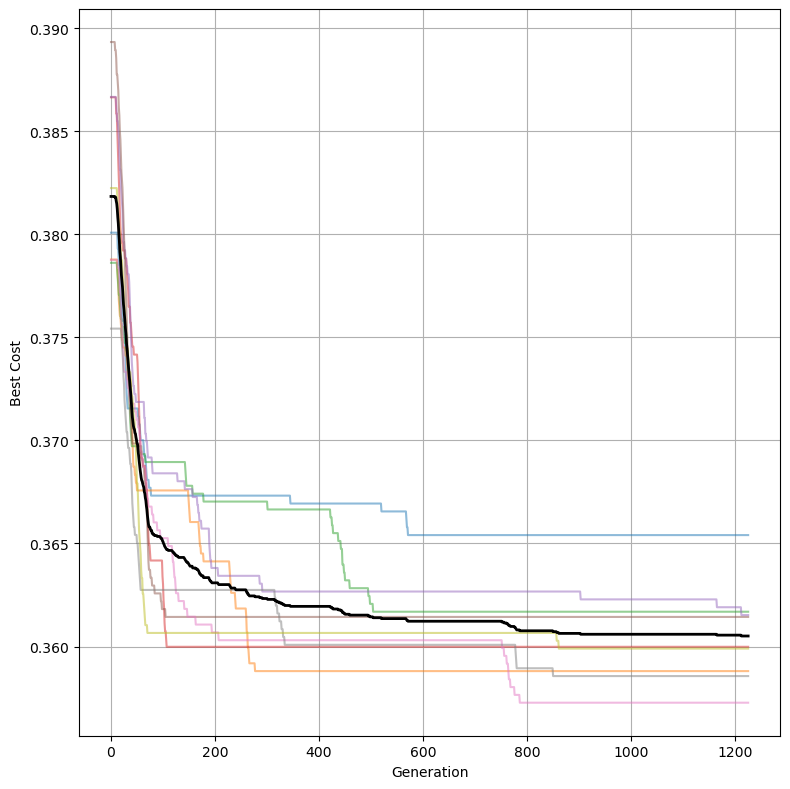

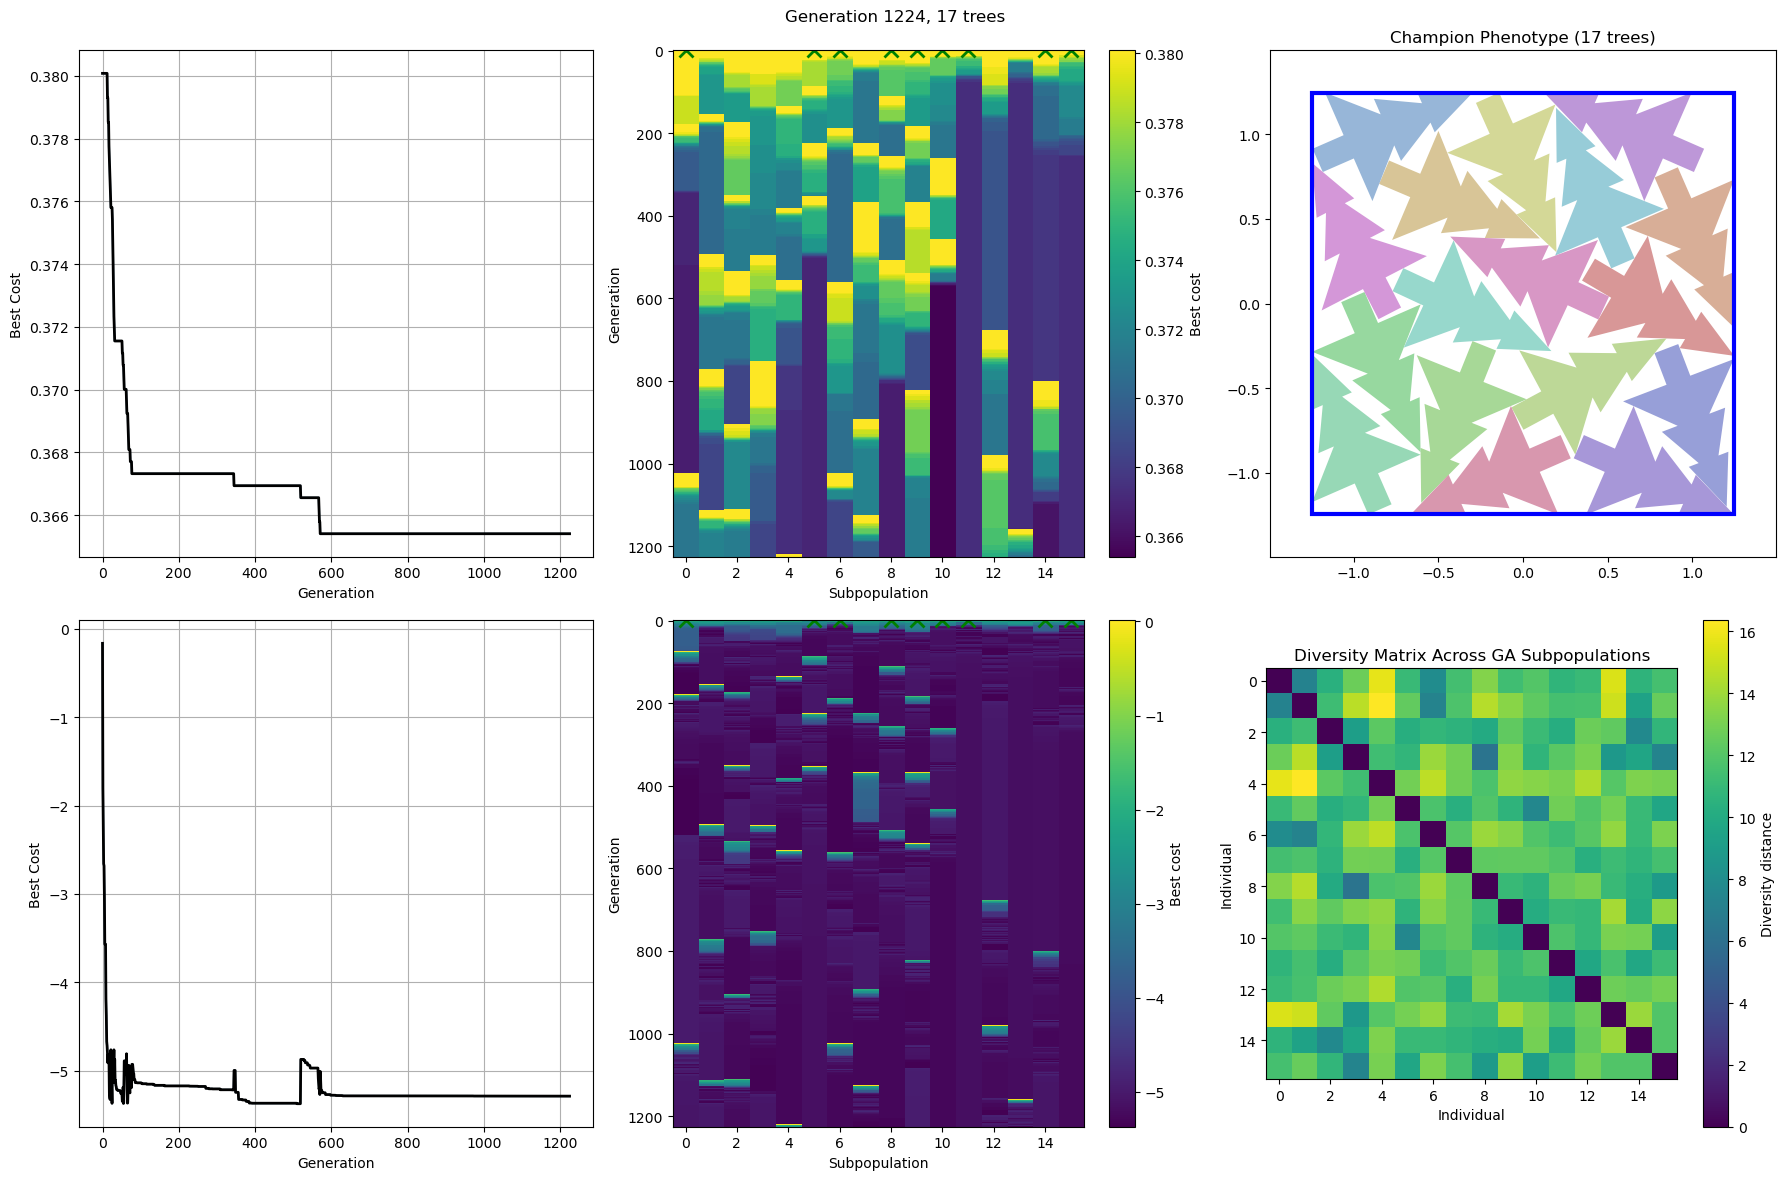

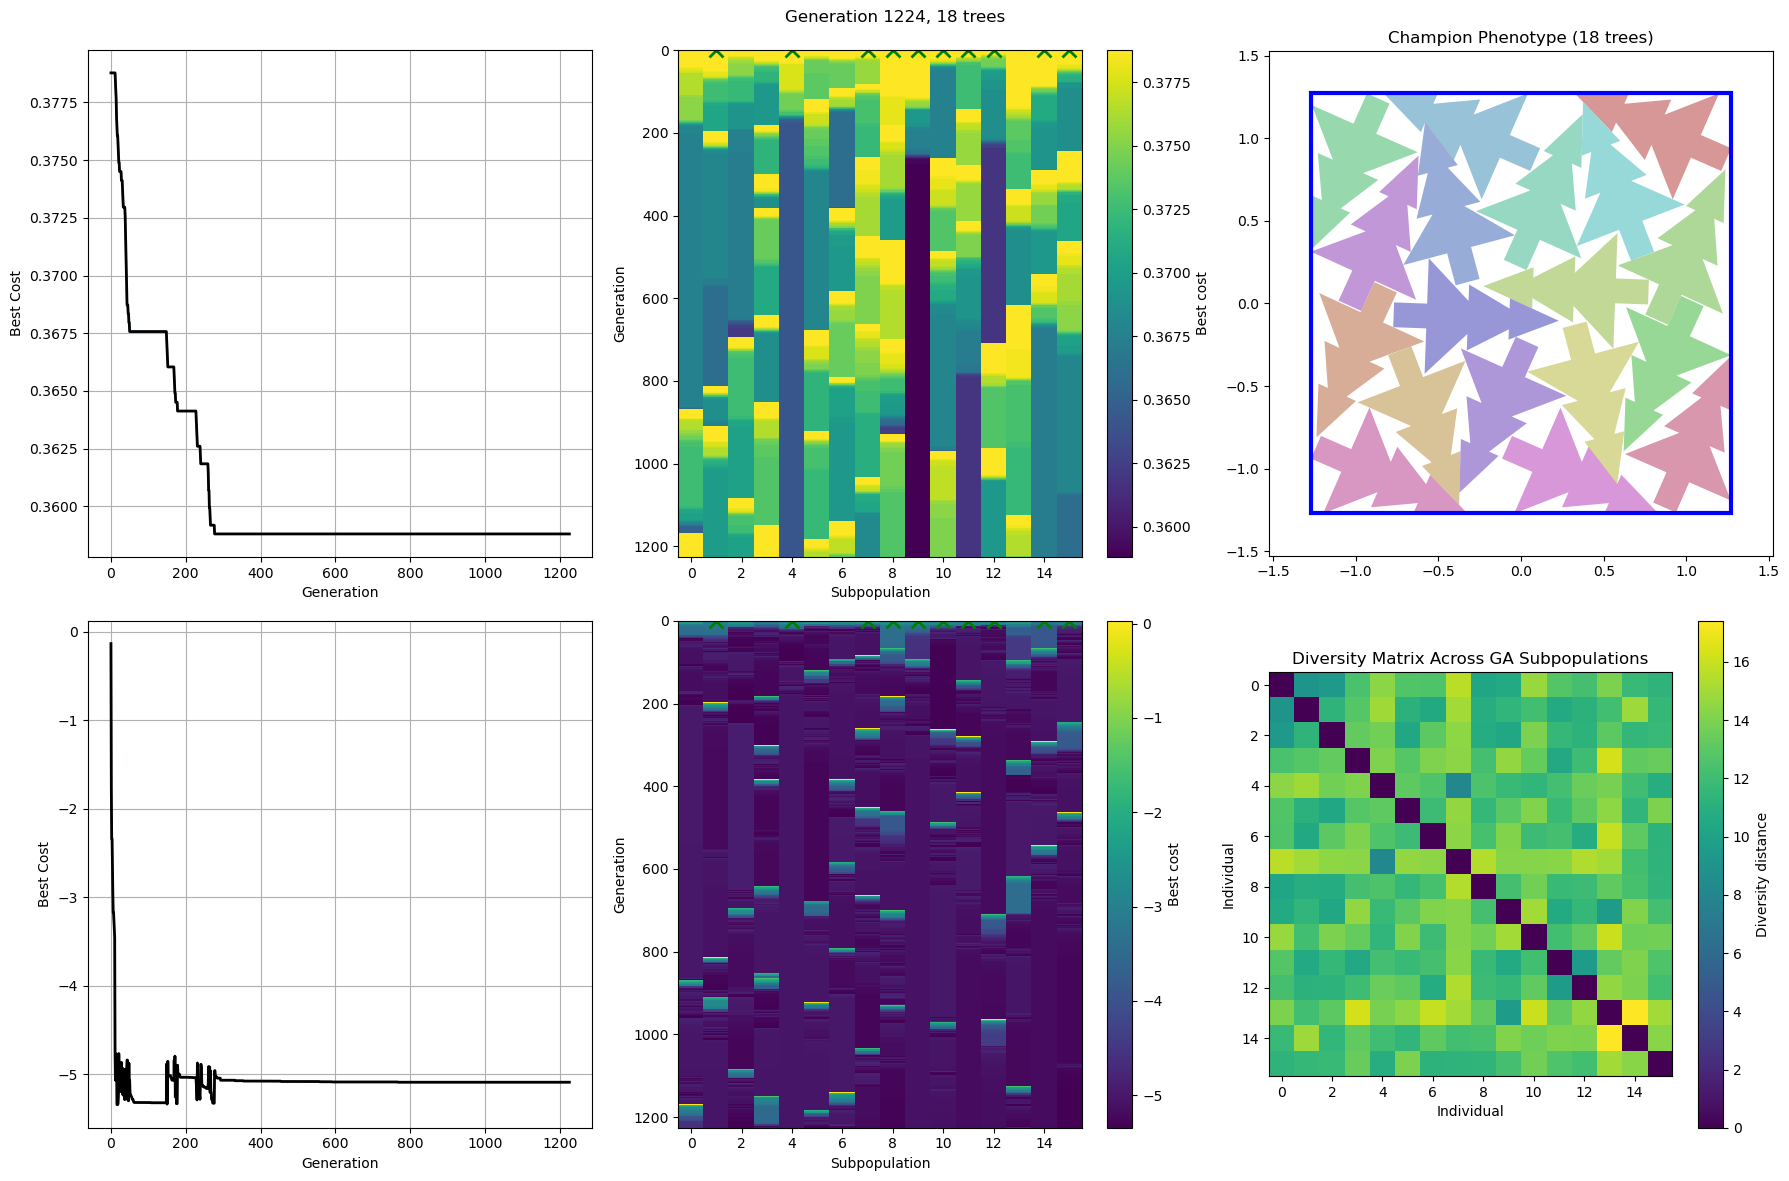

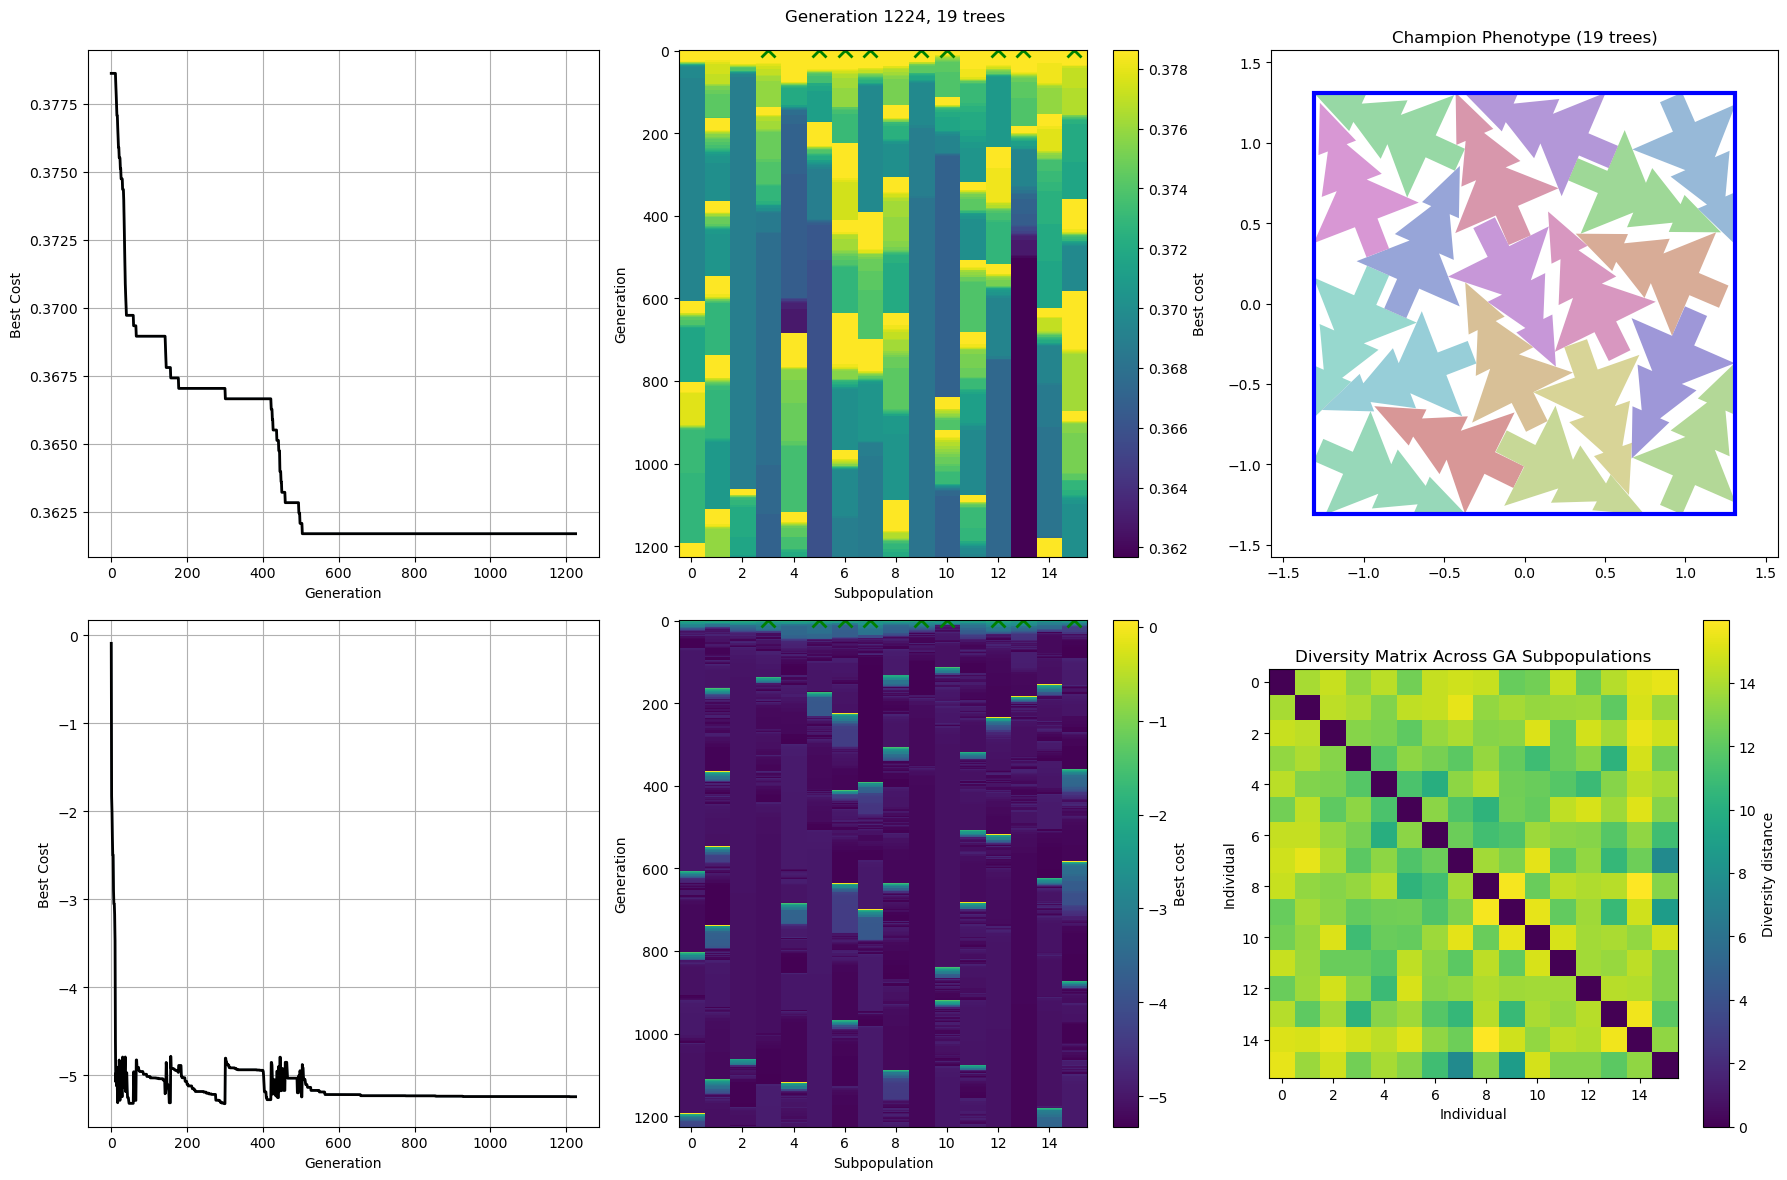

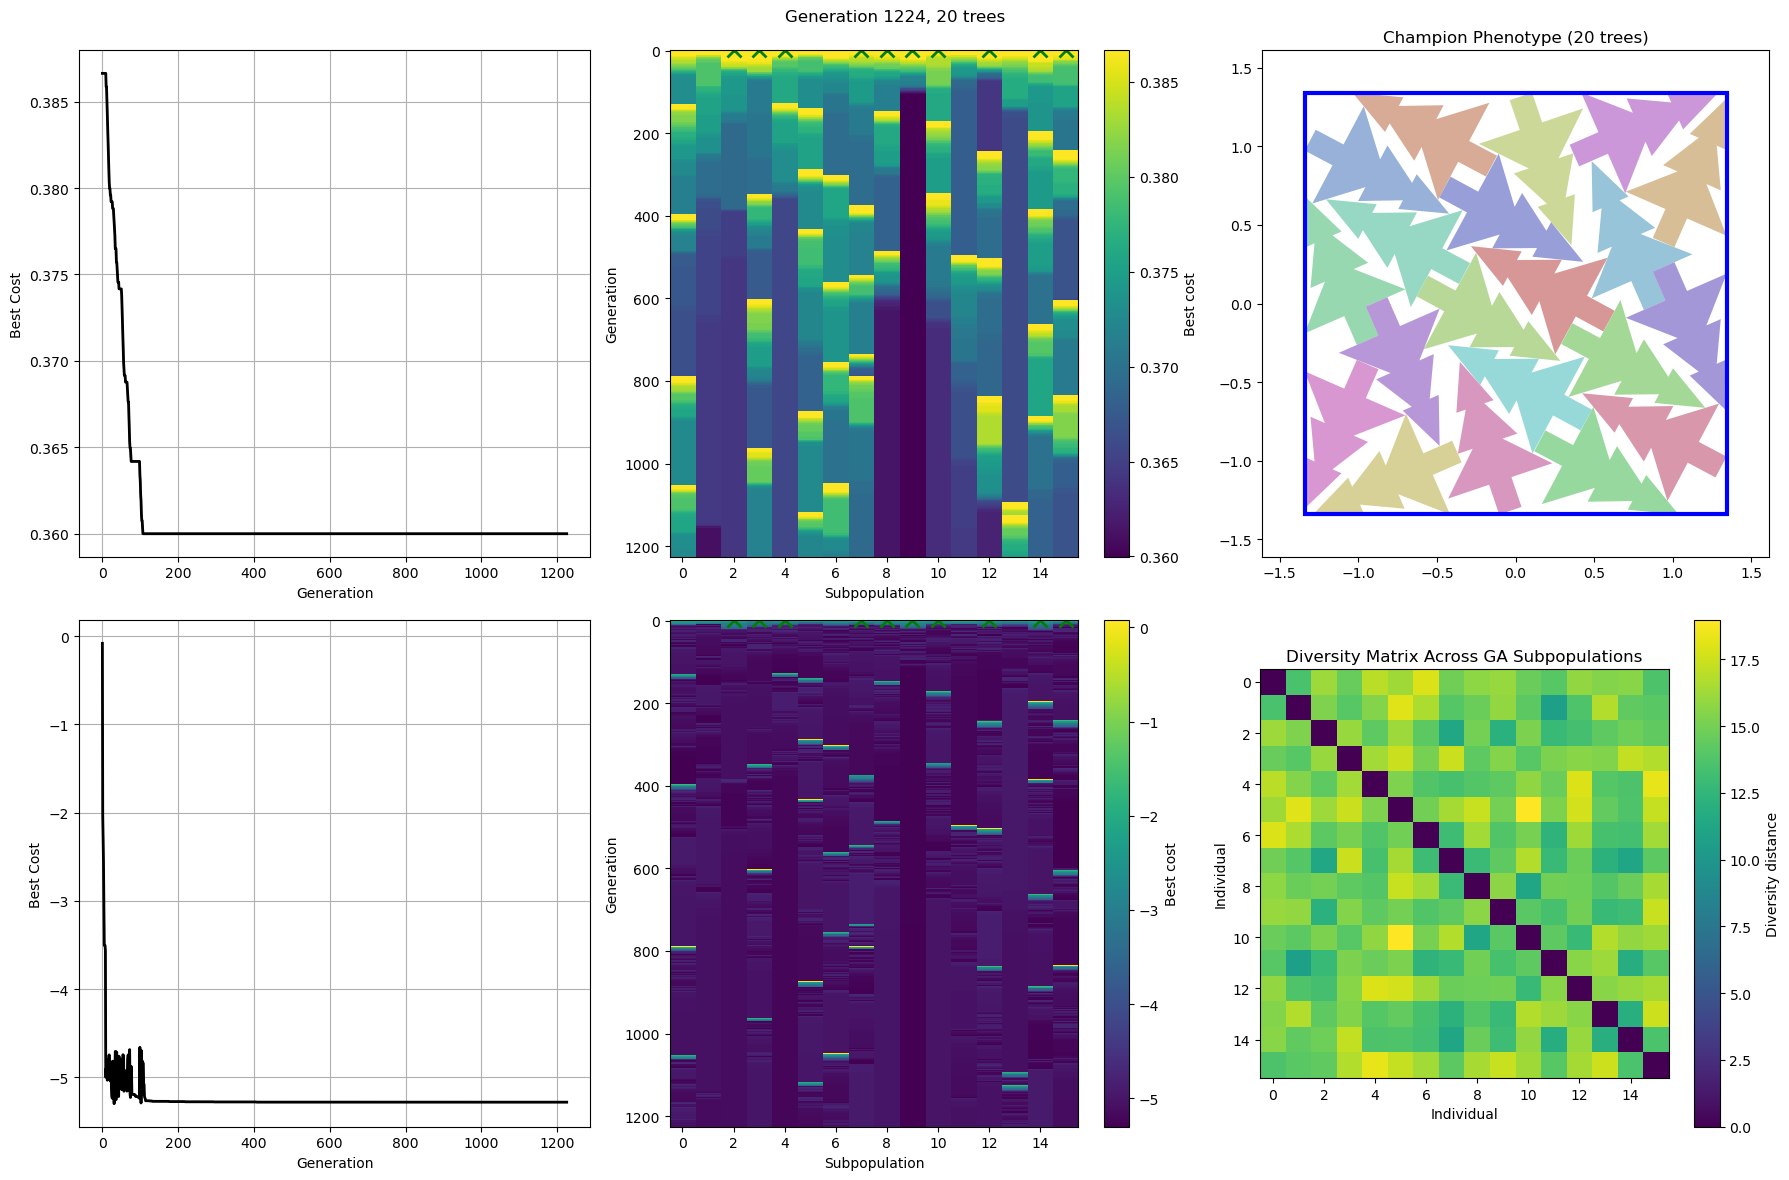

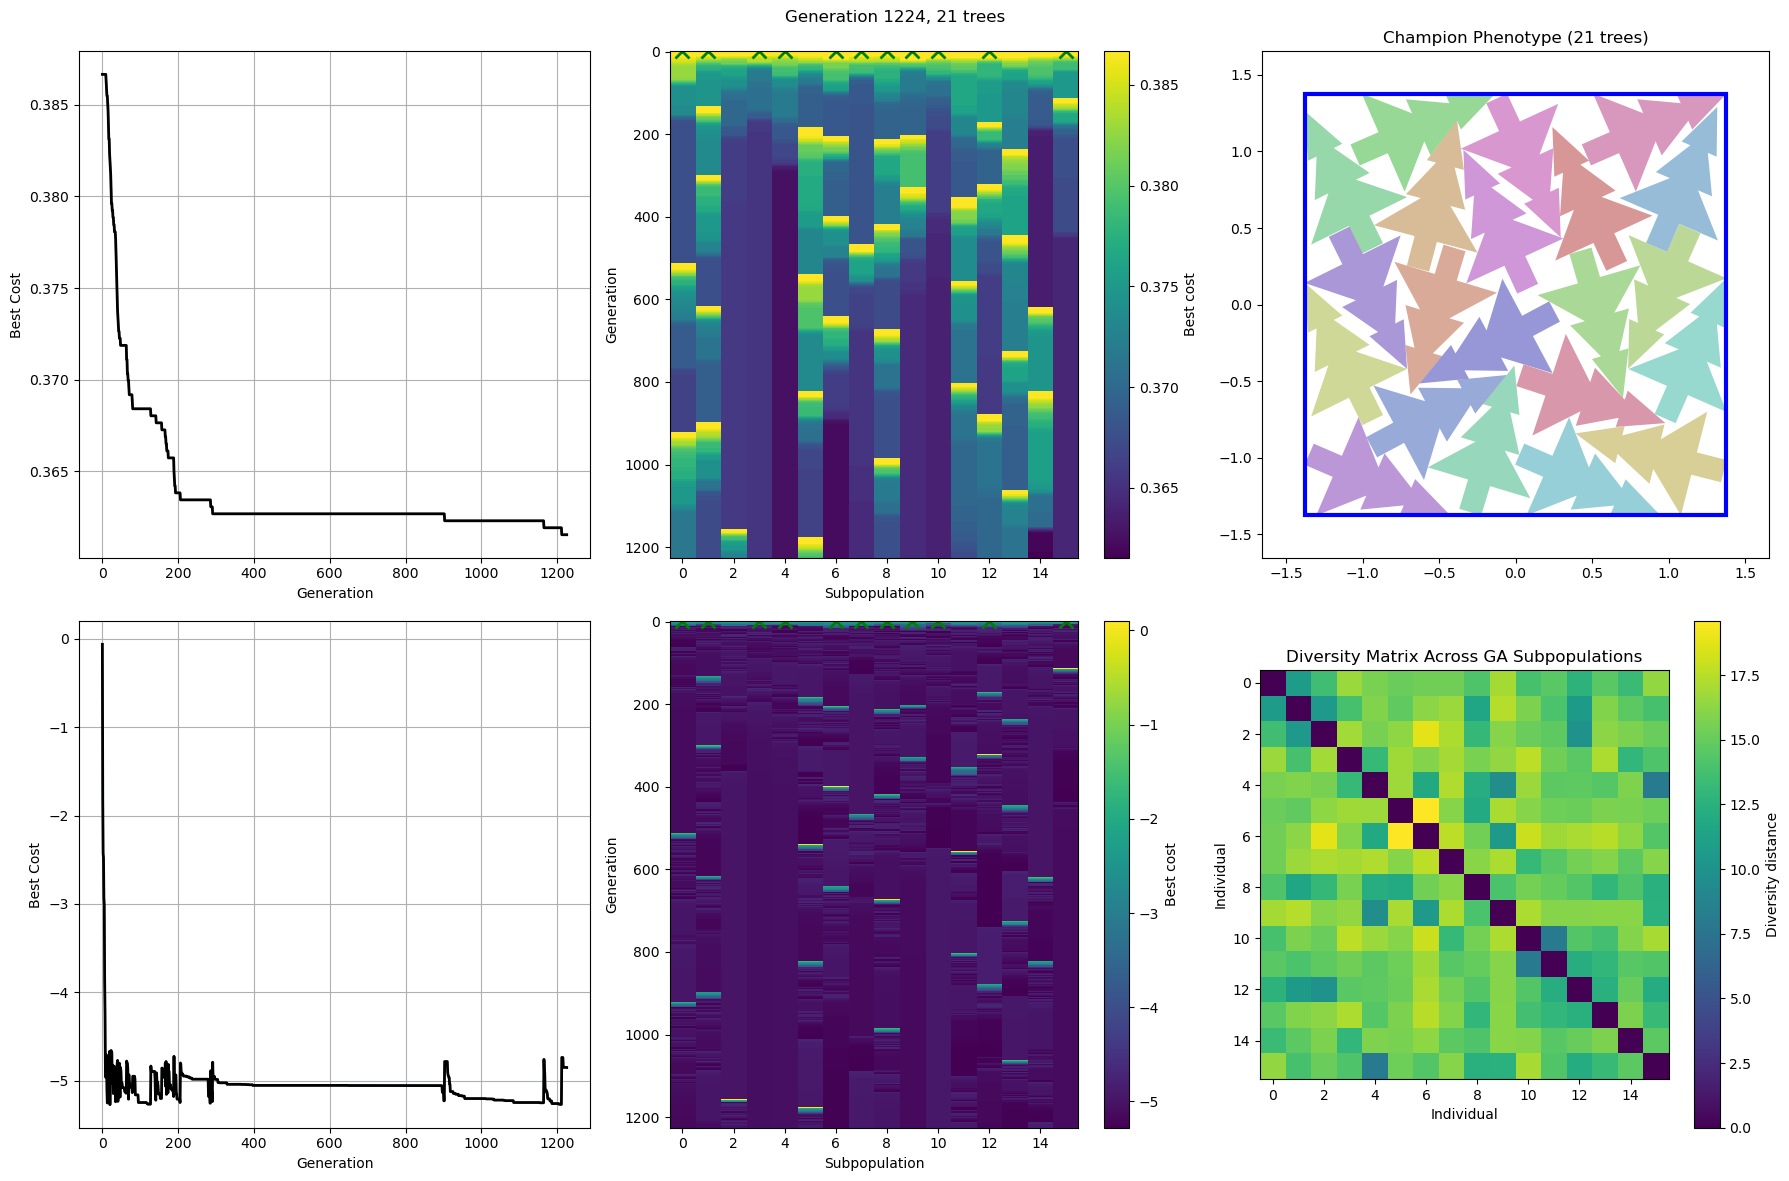

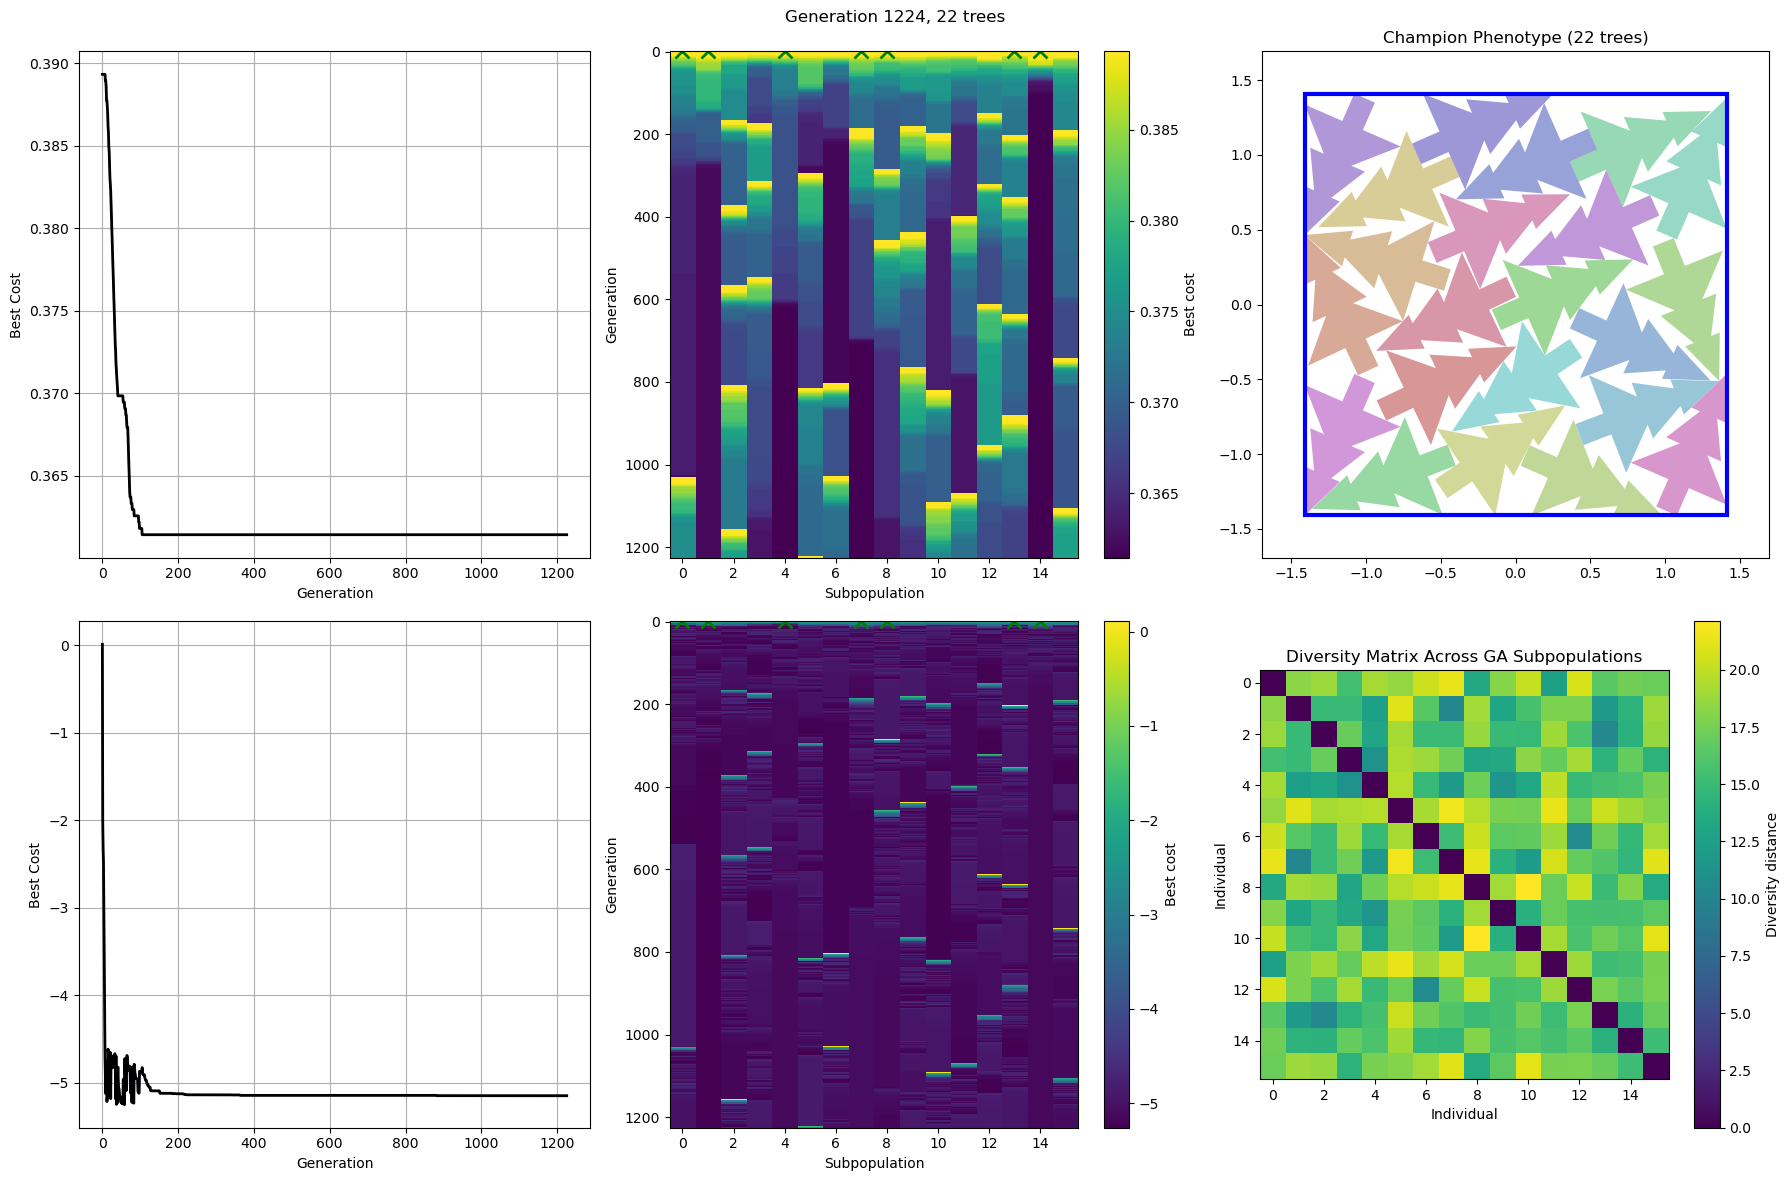

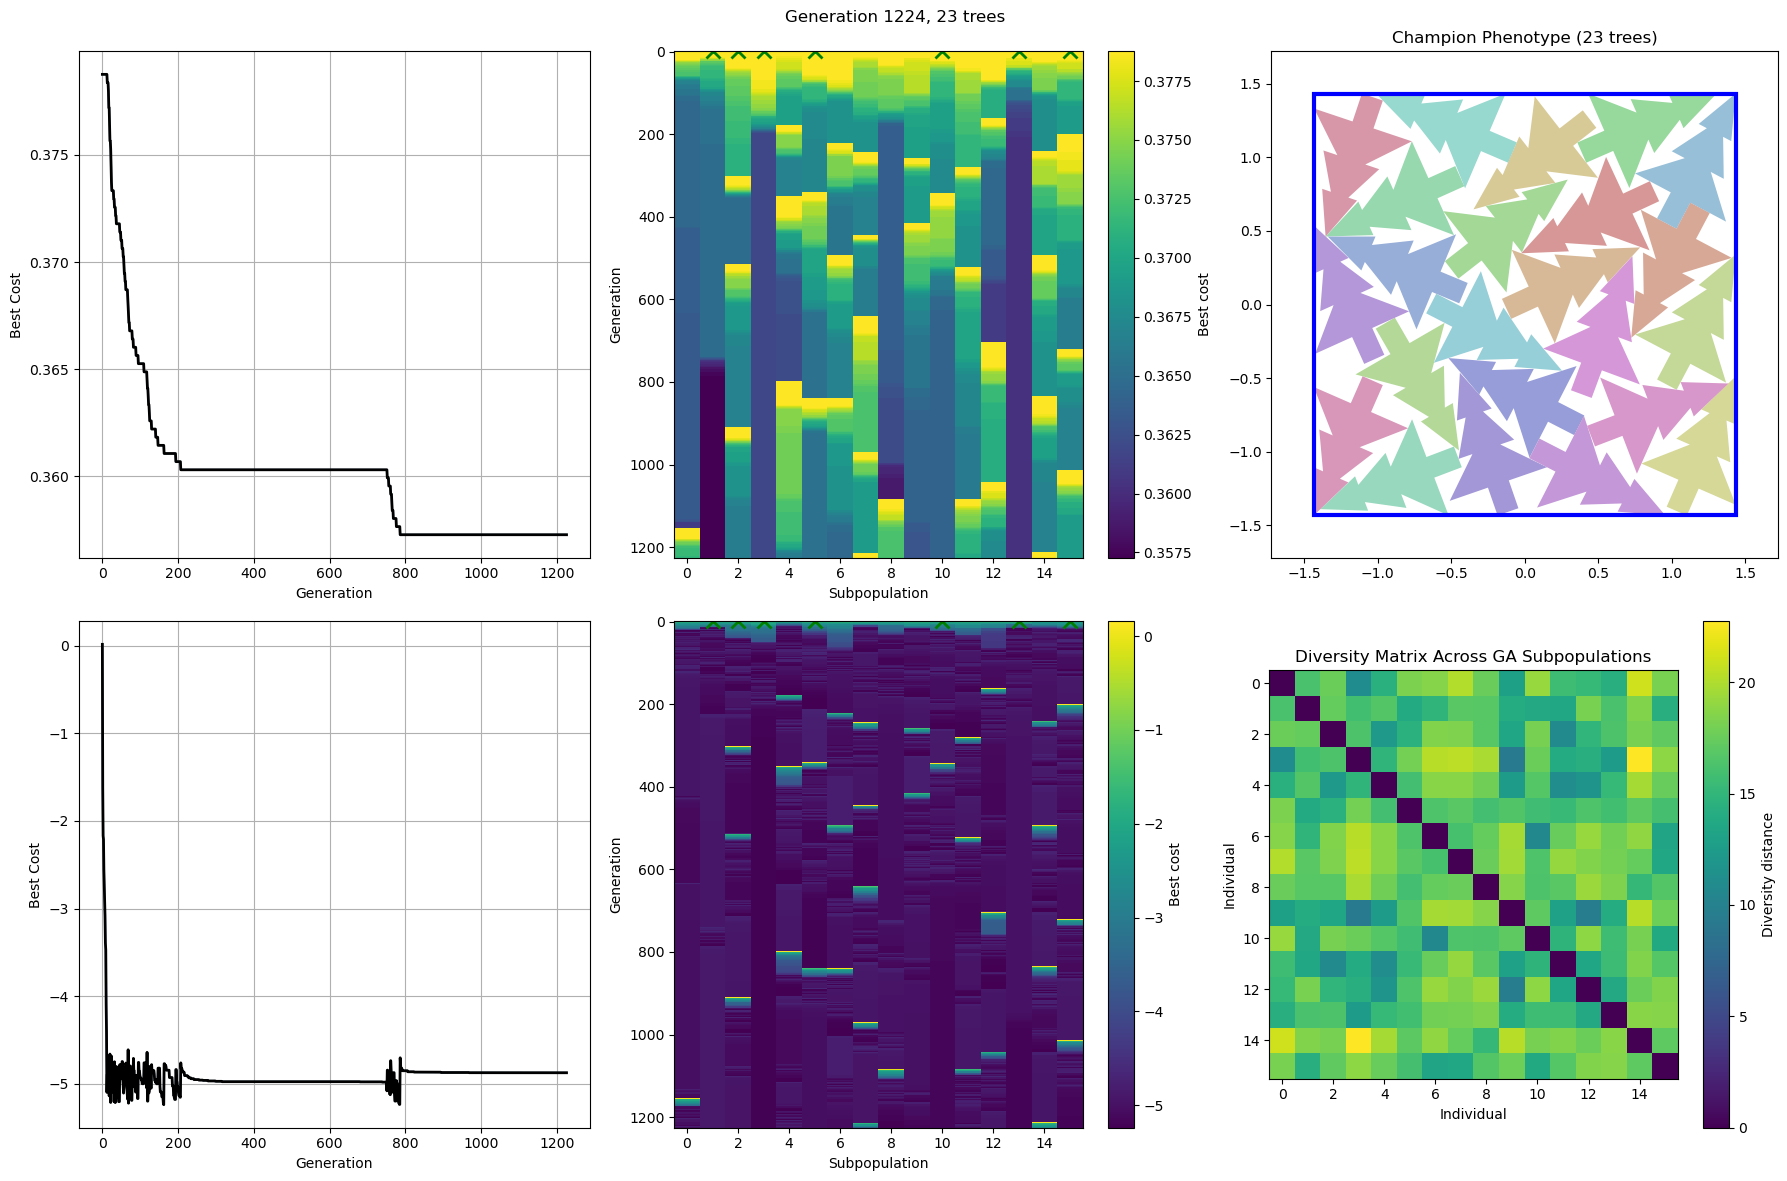

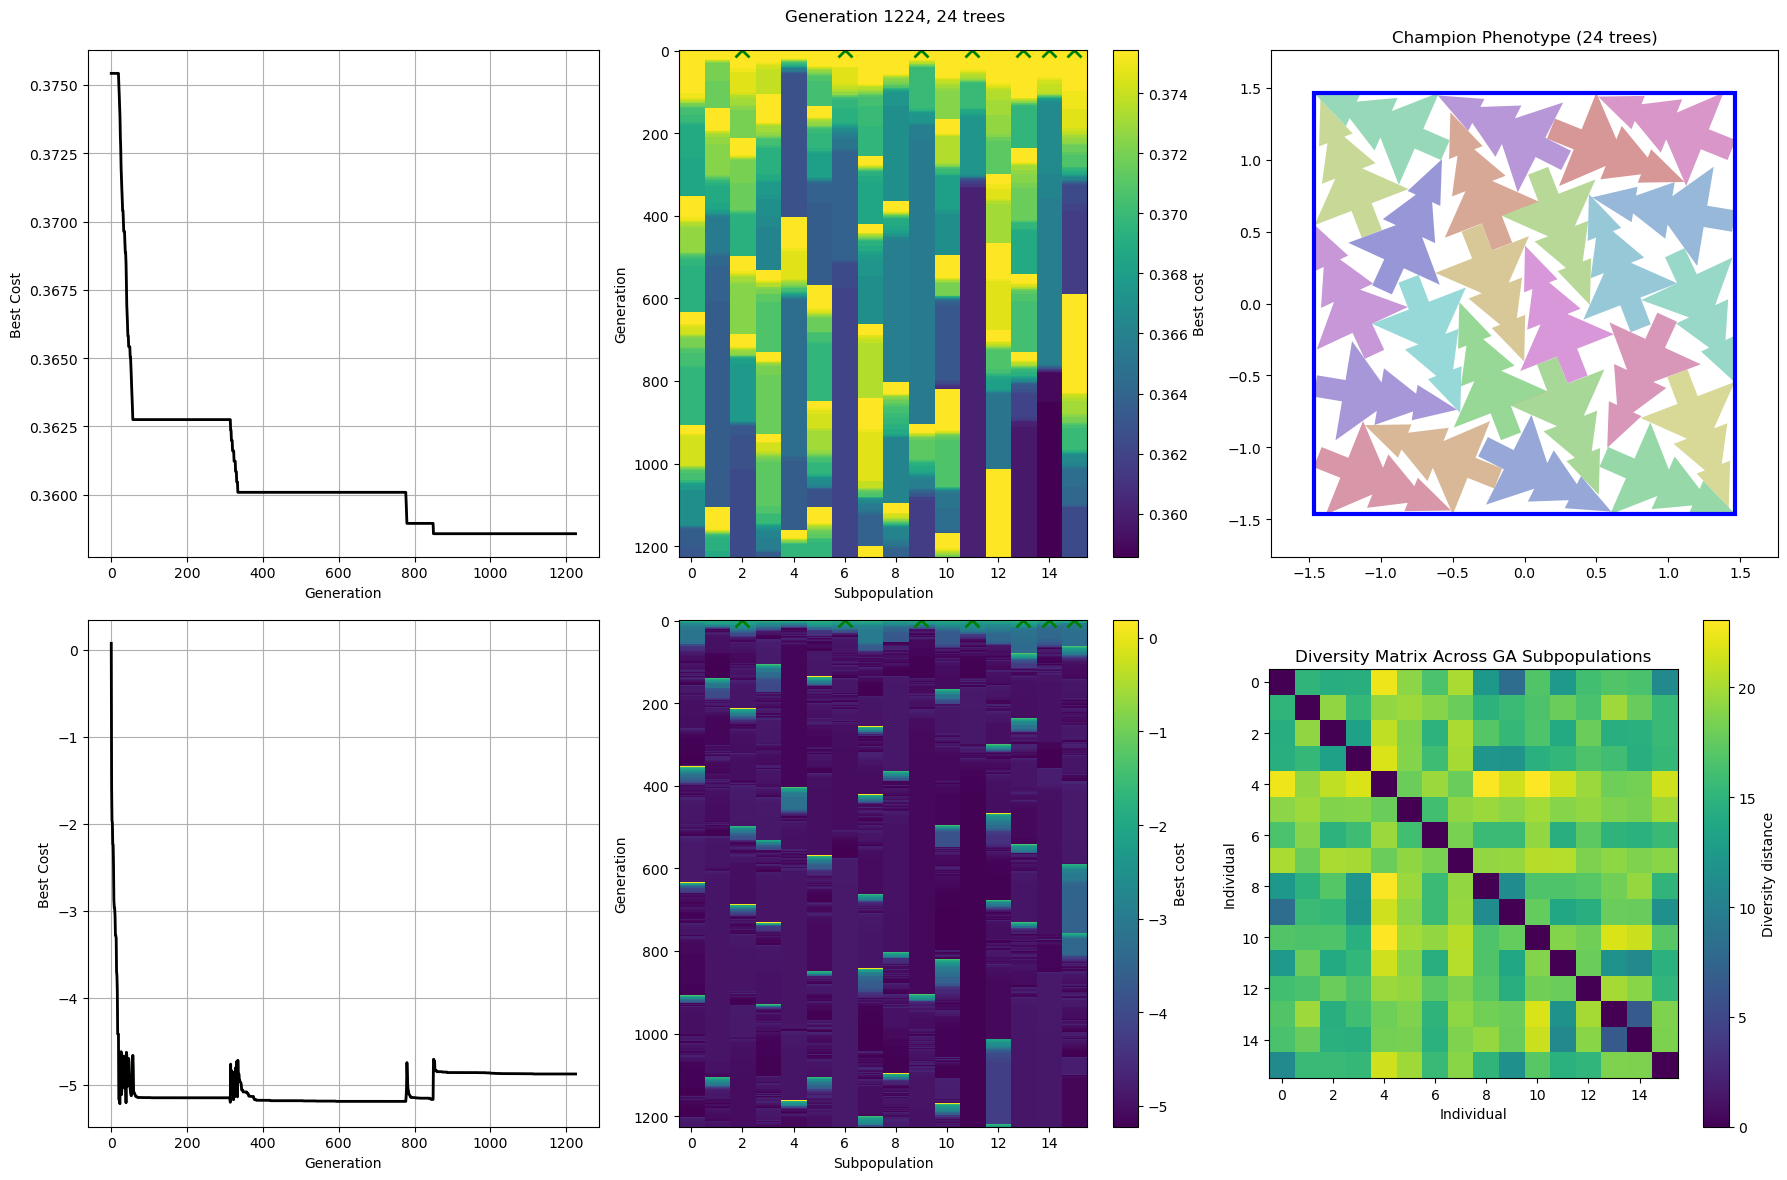

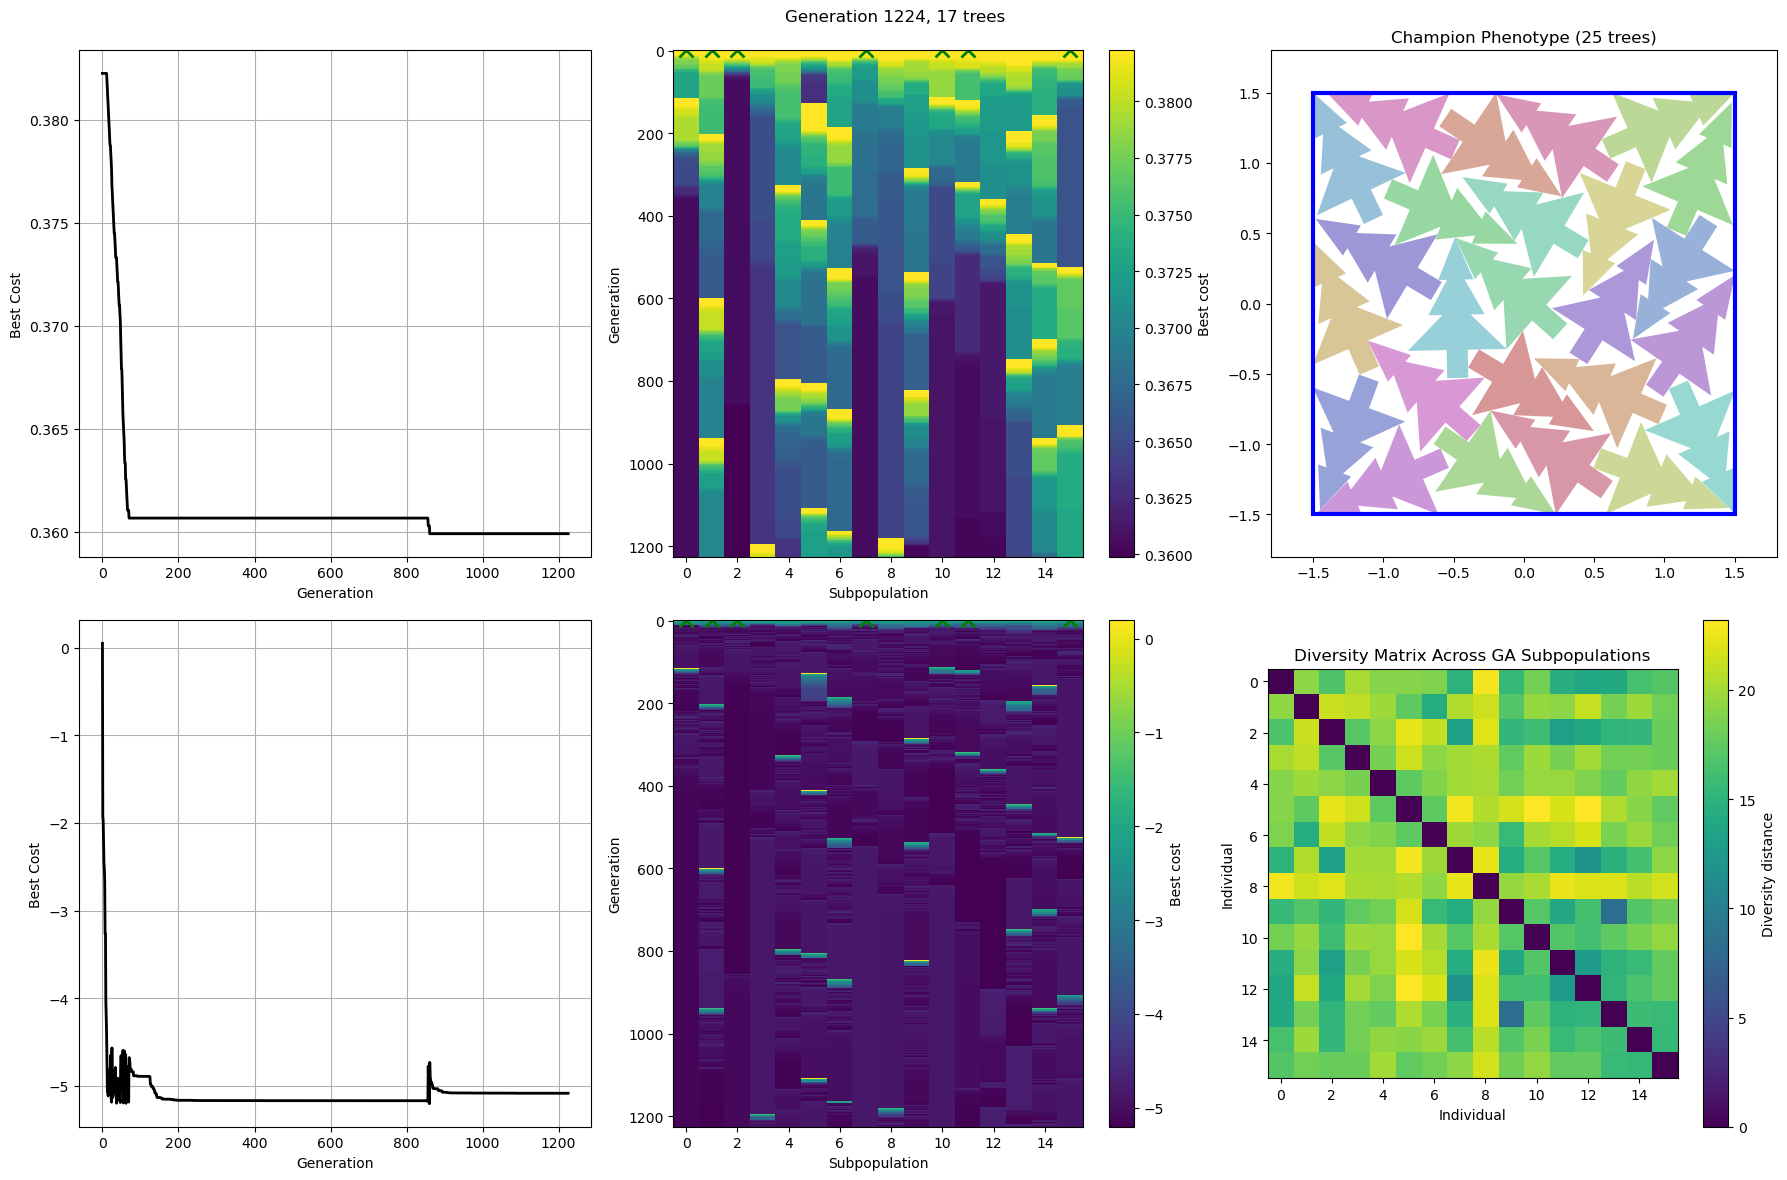

In [8]:
if os.path.isfile(kgs.temp_dir + runner.filename + '.pickle'):
    print("Loading existing runner...")
    runner = kgs.dill_load(kgs.temp_dir + runner.filename + '.pickle')
kgs.debugging_mode = -1000
print('fix above')
runner.run()

In [9]:
rr = kgs.dill_load(kgs.temp_dir + runner.filename + '.pickle')

N=17 best score: [3.6540738e-01 5.1777229e-06]
1
N=18 best score: [3.588077e-01 8.112456e-06]
1
N=19 best score: [3.6168948e-01 5.7079933e-06]
1
N=20 best score: [3.5998708e-01 5.2445812e-06]
1
N=21 best score: [3.6152709e-01 1.4179897e-05]
1
N=22 best score: [3.6143604e-01 7.1263735e-06]
1
1
1
N=23 best score: [3.57275397e-01 1.33411195e-05]
1
N=24 best score: [3.5856721e-01 1.3318482e-05]
1
N=25 best score: [3.5990006e-01 8.2359029e-06]
1


/tmp/ipykernel_4994/3583634074.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

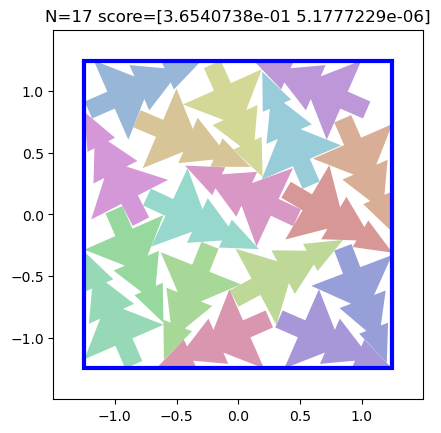

<Figure size 640x480 with 0 Axes>

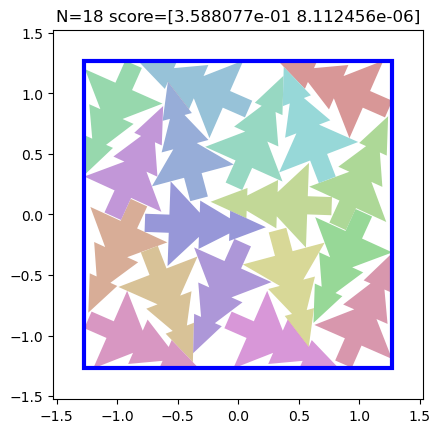

<Figure size 640x480 with 0 Axes>

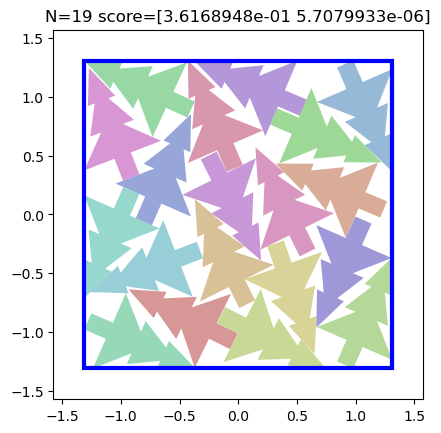

<Figure size 640x480 with 0 Axes>

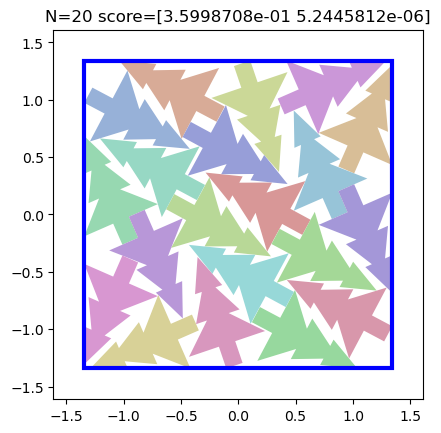

<Figure size 640x480 with 0 Axes>

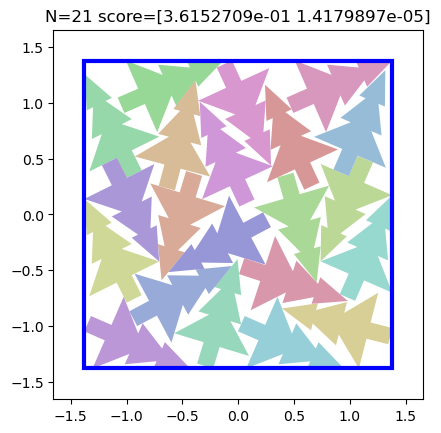

<Figure size 640x480 with 0 Axes>

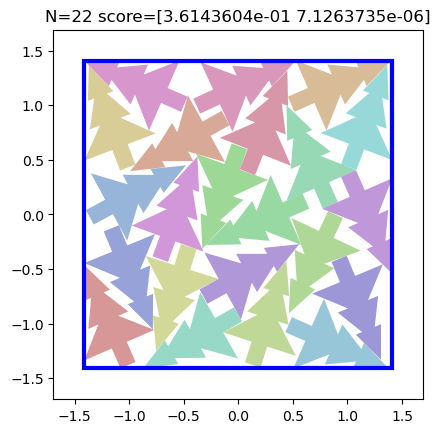

<Figure size 640x480 with 0 Axes>

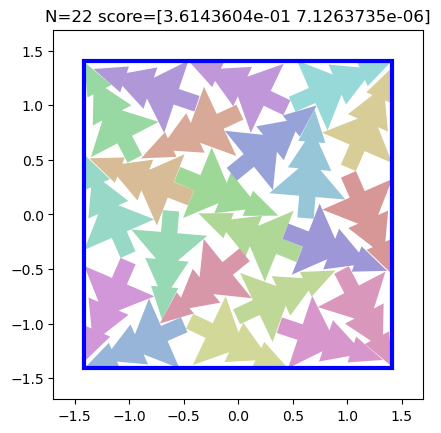

<Figure size 640x480 with 0 Axes>

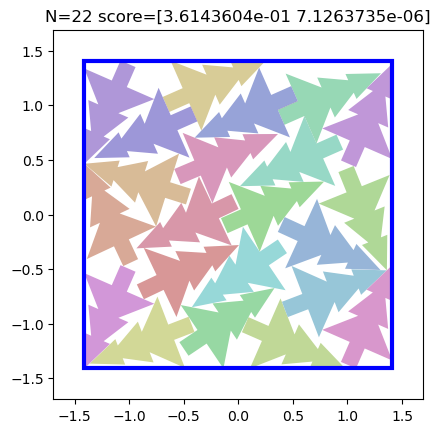

<Figure size 640x480 with 0 Axes>

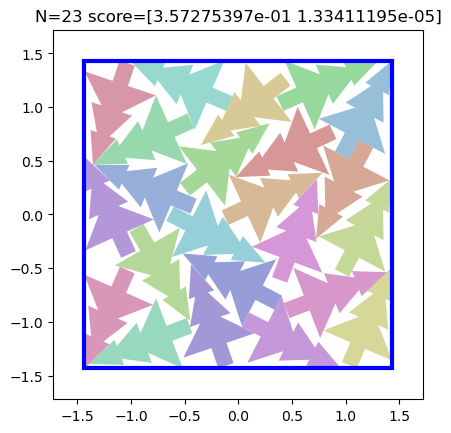

<Figure size 640x480 with 0 Axes>

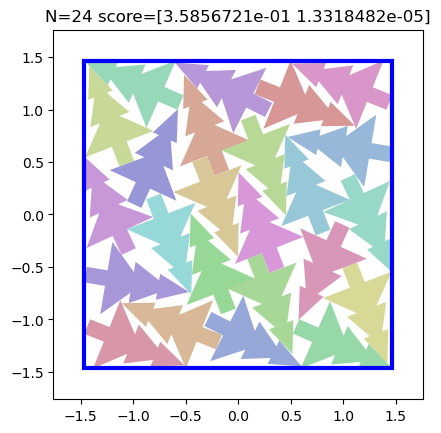

<Figure size 640x480 with 0 Axes>

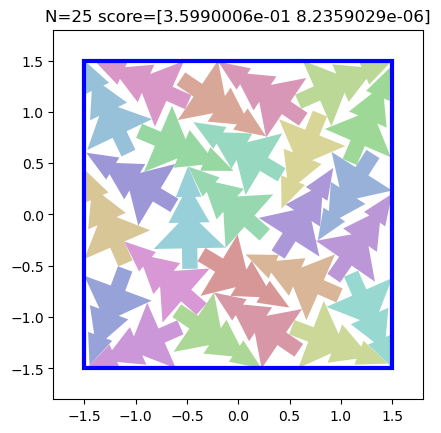

In [10]:
import pack_vis_sol
#rr.ga.diversity_reset_check_frequency = 1
#for ga in rr.ga.ga_list:
#    ga.diversity_reset_check_frequency = 1
#rr.ga.score(register_best=True) # remove duplicates
for ga in rr.ga.ga_list:
    best_score = ga.champions[-1].fitness[0]
    print(f"N={ga.ga_base.N_trees_to_do} best score: {best_score}")
    ga._fig = None
    ga._ax = None
    #ga.diagnostic_plots(-1,None)
    res = []
    for ga2 in ga.ga_list:        
        if ga2.champions[-1].fitness[0][0] == best_score[0]:
            plt.figure()
            pack_vis_sol.pack_vis_sol(ga2.champions[-1].phenotype)
            plt.title(f"N={ga.ga_base.N_trees_to_do} score={best_score}")
            res.append(ga2.champions[-1].phenotype)
            print(ga2.champions[-1].phenotype.N_solutions)

In [11]:
# importlib.reload(kgs)
# rrr=copy.deepcopy(res[0])
# rrr.merge(res[1])
# div_matrix = kgs.compute_genetic_diversity_matrix(rrr.xyt, rrr.xyt)
# div_matrix

In [12]:
for ga in rr.ga.ga_list:
    ga.do_legalize = True
rr.ga.finalize()

Before optimization:  0.06212472915649414 5.475382295117015e-06 2.4923735
After optimization:  0.06176796928048134 0.00014886641292832792 2.4823196
After optimization:  0.06195039302110672 4.045267269248143e-05 2.4881709
After optimization:  0.0620819590985775 1.0661086889740545e-05 2.4914112
After optimization:  0.06215771287679672 2.8338572519714944e-06 2.493088
After optimization:  0.06219983473420143 7.009327305240731e-07 2.4939754
After optimization:  0.06222161650657654 1.7147348785329086e-07 2.4944227
After optimization:  0.06223251298069954 4.2899202412627346e-08 2.4946437
After optimization:  0.0622372180223465 1.5236508943416993e-08 2.4947386
After optimization:  0.06224028766155243 4.7673380798585185e-09 2.4948003
After optimization:  0.06224232167005539 1.0073861744785972e-09 2.494841
After optimization:  0.06224296614527702 4.4018133582568453e-10 2.494854
After optimization:  0.0622434988617897 1.542921346242565e-10 2.4948647
After optimization:  0.06224392354488373 2.3354

/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:60: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  x0 = from_dlpack(x0.toDlpack())
/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:92: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  return from_dlpack(tmp_cost[:N].toDlpack()), from_dlpack(res.toDlpack())


After optimization:  0.06403150409460068 0.00023358447651844472 2.525825
After optimization:  0.06431910395622253 6.401805148925632e-05 2.5348587
After optimization:  0.06452873349189758 1.5571495168842375e-05 2.5399442
After optimization:  0.06464187800884247 3.937778274121229e-06 2.5423992
After optimization:  0.06470316648483276 9.639311429054942e-07 2.5436628
After optimization:  0.0647326335310936 2.5773650236260437e-07 2.5442557
After optimization:  0.0647486001253128 6.601467816835793e-08 2.5445733
After optimization:  0.06475667655467987 1.6046563189320295e-08 2.544733
After optimization:  0.0647590383887291 8.650248517483305e-09 2.5447795
After optimization:  0.06476227939128876 2.3667594550857984e-09 2.5448434
After optimization:  0.06476402282714844 3.985705654407923e-10 2.5448778
After optimization:  0.06476449221372604 9.390430794065097e-11 2.5448868
Score of generated dataframe: 0.35980083321028744
Before optimization:  0.06872714310884476 6.143453902041074e-06 2.621469


/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:60: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  x0 = from_dlpack(x0.toDlpack())
/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:92: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  return from_dlpack(tmp_cost[:N].toDlpack()), from_dlpack(res.toDlpack())


After optimization:  0.06823782622814178 0.00019171868916600943 2.6085649
After optimization:  0.0684596374630928 6.040322477929294e-05 2.6153247
After optimization:  0.0686517283320427 1.5094781701918691e-05 2.6198595
After optimization:  0.06876271963119507 3.621322093749768e-06 2.6221957
After optimization:  0.06881420314311981 1.1345314305799548e-06 2.6232245
After optimization:  0.06884780526161194 2.556622860083735e-07 2.6238818
After optimization:  0.06886336952447891 7.135763269161544e-08 2.6241817
After optimization:  0.06887105107307434 2.538185839284779e-08 2.624329
After optimization:  0.0688747763633728 1.2616908406926086e-08 2.6244004
After optimization:  0.06887950003147125 3.6591245589079335e-09 2.6244905
After optimization:  0.0688808411359787 9.311039161907786e-10 2.624516
After optimization:  0.06888160854578018 4.2884878981297447e-10 2.6245306
After optimization:  0.06888210773468018 2.24123997139003e-10 2.62454
After optimization:  0.06888271868228912 5.20276044468

/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:60: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  x0 = from_dlpack(x0.toDlpack())
/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:92: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  return from_dlpack(tmp_cost[:N].toDlpack()), from_dlpack(res.toDlpack())


After optimization:  0.07161257416009903 0.00015601268387399614 2.673136
After optimization:  0.07179795950651169 4.389727837406099e-05 2.678695
After optimization:  0.07193031162023544 1.3299799320520833e-05 2.6817348
After optimization:  0.07201871275901794 4.2396113713039085e-06 2.6835513
After optimization:  0.07208255678415298 1.066736786015099e-06 2.6847997
After optimization:  0.07211426645517349 2.9987882044224534e-07 2.6854043
After optimization:  0.07213173061609268 9.460406147354661e-08 2.6857333
After optimization:  0.07214318960905075 2.6453056634068162e-08 2.685948
After optimization:  0.07214824110269547 8.997536049548671e-09 2.6860423
After optimization:  0.07215222716331482 2.066283588675333e-09 2.6861167
After optimization:  0.07215366512537003 6.828383414259065e-10 2.6861434
After optimization:  0.07215441763401031 2.862864112440633e-10 2.6861575
After optimization:  0.07215516269207001 6.20251419669593e-11 2.6861713
Score of generated dataframe: 0.3607744872708836
B

/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:60: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  x0 = from_dlpack(x0.toDlpack())
/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:92: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  return from_dlpack(tmp_cost[:N].toDlpack()), from_dlpack(res.toDlpack())


After optimization:  0.07553213834762573 0.0001900513016153127 2.7448514
After optimization:  0.07576661556959152 5.080867049400695e-05 2.7516506
After optimization:  0.07593099027872086 1.3210262295615394e-05 2.7553182
After optimization:  0.0760219618678093 3.6459919101616833e-06 2.757142
After optimization:  0.076072558760643 9.16262081318564e-07 2.7581089
After optimization:  0.07610026746988297 2.349382128841171e-07 2.7586234
After optimization:  0.07611554861068726 5.261831503844405e-08 2.7589037
After optimization:  0.0761219933629036 1.52822750010273e-08 2.7590213
After optimization:  0.07612393796443939 9.300432424197425e-09 2.7590566
After optimization:  0.07612726092338562 2.3866275622452804e-09 2.759117
After optimization:  0.07612878829240799 5.720892648497511e-10 2.7591445
After optimization:  0.0761294960975647 1.5917278606281116e-10 2.7591574
After optimization:  0.07612984627485275 2.9909547061279795e-11 2.7591639
Score of generated dataframe: 0.36251900793600517
Befor

/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:60: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  x0 = from_dlpack(x0.toDlpack())
/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:92: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  return from_dlpack(tmp_cost[:N].toDlpack()), from_dlpack(res.toDlpack())


After optimization:  0.0789814293384552 0.00019501624046824872 2.8068917
After optimization:  0.07921828329563141 6.66070482111536e-05 2.8133907
After optimization:  0.0794275626540184 1.7985574231715873e-05 2.8179705
After optimization:  0.0795513466000557 5.284087819745764e-06 2.8203912
After optimization:  0.07962940633296967 1.571028178659617e-06 2.8218405
After optimization:  0.07967822253704071 3.5690351296580047e-07 2.8227267
After optimization:  0.07970007508993149 9.803469680491617e-08 2.8231184
After optimization:  0.07970818132162094 4.801054842573649e-08 2.823263
After optimization:  0.07971764355897903 1.1585081338694181e-08 2.8234313
After optimization:  0.07972216606140137 2.3185879882703375e-09 2.8235114
After optimization:  0.07972345501184464 9.989264970755585e-10 2.8235343
After optimization:  0.07972454279661179 3.306392937219016e-10 2.8235536
After optimization:  0.07972542196512222 4.6395796926557153e-11 2.823569
Score of generated dataframe: 0.36238372516150474
B

/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:60: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  x0 = from_dlpack(x0.toDlpack())
/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:92: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  return from_dlpack(tmp_cost[:N].toDlpack()), from_dlpack(res.toDlpack())


After optimization:  0.08179948478937149 0.00019205428543500602 2.8567014
After optimization:  0.08203187584877014 4.976597483619116e-05 2.863252
After optimization:  0.08217811584472656 1.468713890062645e-05 2.8664165
After optimization:  0.0822778269648552 3.566133955246187e-06 2.868349
After optimization:  0.08233346045017242 7.513380069212872e-07 2.8693676
After optimization:  0.08235467225313187 2.158817409281255e-07 2.8697467
After optimization:  0.08236667513847351 6.364662397118082e-08 2.8699584
After optimization:  0.082374207675457 1.5877093417770993e-08 2.8700905
After optimization:  0.0823761448264122 1.0140946749004343e-08 2.8701243
After optimization:  0.08237971365451813 3.239381651809481e-09 2.8701866
After optimization:  0.08238063007593155 1.4269864179183855e-09 2.8702025
After optimization:  0.08238176256418228 5.368441802211521e-10 2.8702223
After optimization:  0.08238286525011063 3.606653864451914e-11 2.8702416
Score of generated dataframe: 0.3581856257304327
Befo

/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:60: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  x0 = from_dlpack(x0.toDlpack())
/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:92: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  return from_dlpack(tmp_cost[:N].toDlpack()), from_dlpack(res.toDlpack())


After optimization:  0.08564022183418274 0.0002051391202257946 2.922928
After optimization:  0.0858849361538887 5.57255043531768e-05 2.9296622
After optimization:  0.0860581174492836 1.525186871731421e-05 2.9333065
After optimization:  0.08616089820861816 4.224814802000765e-06 2.9352458
After optimization:  0.08621804416179657 1.4223645621314063e-06 2.9362667
After optimization:  0.08625464886426926 3.4321902830924955e-07 2.9369085
After optimization:  0.08627206087112427 9.515355969824668e-08 2.937209
After optimization:  0.08628332614898682 1.8967217130239078e-08 2.937402
After optimization:  0.08628597110509872 1.1053511883574174e-08 2.9374473
After optimization:  0.08629008382558823 2.8955207120873183e-09 2.9375174
After optimization:  0.08629162609577179 1.4653873670056328e-09 2.9375436
After optimization:  0.08629303425550461 6.040495326153916e-10 2.9375677
After optimization:  0.08629392087459564 2.779177998846194e-10 2.9375827
After optimization:  0.08629461377859116 1.09460107

/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:60: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  x0 = from_dlpack(x0.toDlpack())
/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:92: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  return from_dlpack(tmp_cost[:N].toDlpack()), from_dlpack(res.toDlpack())


After optimization:  0.08947674185037613 0.0002182641765102744 2.9876158
After optimization:  0.08974801748991013 5.6171422329498455e-05 2.9948597
After optimization:  0.08992790430784225 1.4984625522629358e-05 2.9985483
After optimization:  0.0900365337729454 4.014060323243029e-06 3.000542
After optimization:  0.09009856730699539 1.0246731108054519e-06 3.0016253
After optimization:  0.09013102948665619 2.5690582106108195e-07 3.0021787
After optimization:  0.09014762938022614 6.396492580051927e-08 3.0024586
After optimization:  0.0901557132601738 1.6866334107135117e-08 3.0025938
After optimization:  0.09015853703022003 8.31815505364375e-09 3.002641
After optimization:  0.0901617482304573 1.929535198286203e-09 3.0026946
After optimization:  0.09016292542219162 6.645107242242432e-10 3.0027142
After optimization:  0.09016358852386475 2.5610702447664835e-10 3.0027254
After optimization:  0.0901641920208931 5.28559418455643e-11 3.0027354
Score of generated dataframe: 0.36065520391017347


In [13]:
# import pack_io
# sol_list = [ga.champions[-1].phenotype for ga in rr.ga.ga_list]
# df = pack_io.solution_list_to_dataframe(sol_list)

In [14]:
sol_list = [ga.champions[-1].phenotype for ga in rr.ga.ga_list]
kgs.dill_save(kgs.code_dir + f'../res/' + runner.filename + '.pickle', sol_list)

In [ ]:
print(kgs.code_dir + f'../res/' + runner.filename + '.pickle')